In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
# from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima 

import math

In [3]:
# initialisation des données

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_data = pd.read_csv("C:/Users/maelm/Documents/L2/PROJET S3/Tesla/TSLA.csv",sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

train_data = stock_data['Close']["2013-01-01":"2014-01-01"]

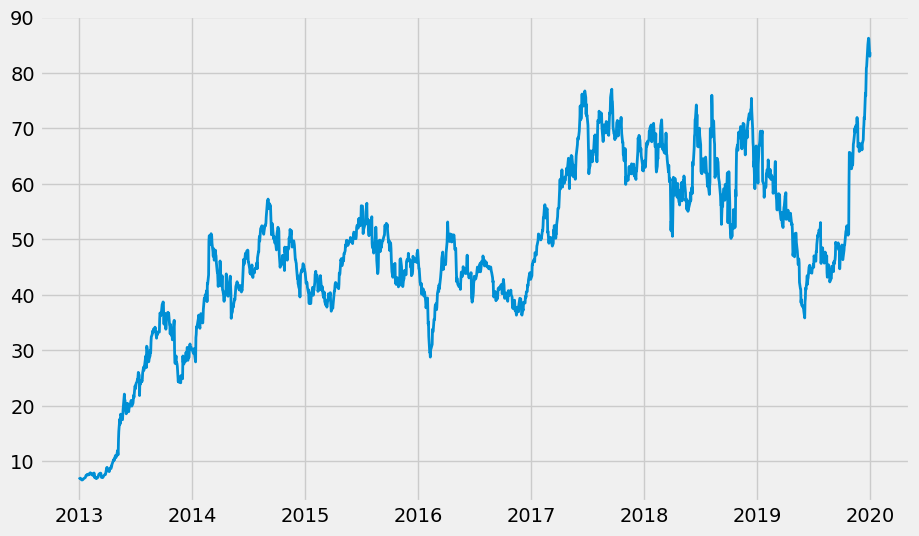

In [4]:
# afficher les données

plt.plot(stock_data["Close"]["2013-01-01":"2020-01-01"], linewidth=2)

In [5]:
sarima_pred = auto_arima(train_data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=False, 
                         D=2, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

C:\Users\maelm\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


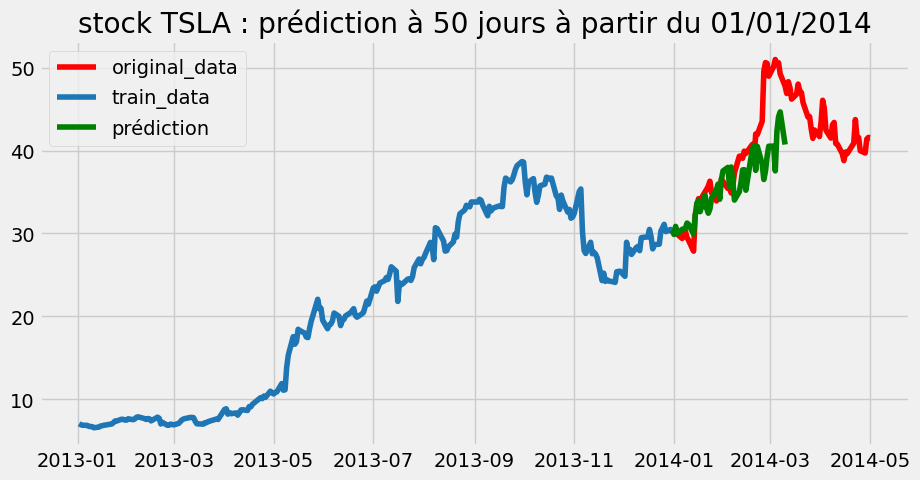

In [6]:
# afficher la prédiction

def forecast(ARIMA_model, periods=50):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(train_data.index[-1] + pd.DateOffset(day=0), periods = n_periods, freq='B')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted.array, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # print(fitted_series)
    # print(lower_series)
    # Plot
    plt.figure(figsize=(10,5))
    plt.plot(stock_data['Close']["2014-01-01":"2014-05-01"], color='red', label ="original_data")
    plt.plot(train_data, color='#1f76b4', label="train_data")
    plt.plot(fitted_series, color='green', label="prédiction")
    """plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)"""
    plt.legend()
    plt.title("stock TSLA : prédiction à 50 jours à partir du 01/01/2014")
    plt.show()

forecast(sarima_pred)

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
ARIMA_model = sarima_pred

n_periods = 50
fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(train_data.index[-1] + pd.DateOffset(day=0), periods = n_periods, freq='B')
print(mean_absolute_error(fitted.array, stock_data['Close']["2014-01-01":"2014-03-15"]))
print(mean_squared_error(fitted.array, stock_data['Close']["2014-01-01":"2014-03-15"], squared=False))

3.9955013279529954
5.551077872742174


C:\Users\maelm\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
def différenciation(serie):
    res= []
    for i in range(len(serie)):
        val=serie[i]-serie[i-1]
        if i !=0:
            res.append(val)
    return res

def trace():
    serie = stock_data["Close"]["2013-01-01":"2020-01-01"]

    original = différenciation(serie)
    rolmean10 = serie.rolling(30).mean()
    rolmean120 = serie.rolling(120).mean()
    linéaire10 = différenciation(rolmean10)
    linéaire120 = différenciation(rolmean120)

    plt.plot(original, linewidth=1, label="série d'origine")
    plt.plot(linéaire10, linewidth=1.2, label="moyenne glissante à 50 jours")
    plt.plot(linéaire120, linewidth=1.2, color="black", label="moyenne glissante à 120 jours")

    plt.title("Différenciation de série temporelle avec et sans moyenne glissante")
    plt.legend()
    plt.show()

trace()